# Trabalho 02 Machine Learning

Felipe Santana Dias 215775
Letícia Adrielli Luz 220208

## Parte 1

Para a parte 1 foram utilizados dois conjuntos de dados que representam ⅓ de segundo da trajetória inicial de dois chutes, considerando uma captura de 60 frames por segundo. A função read_data() foi usada para fazer a leitura dos dados enquanto a função plot_data() mostrará o conjunto kick1.dat e kick2.dat, respectivamente

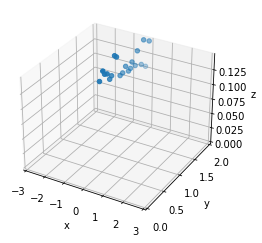

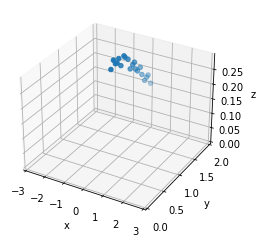

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(file):
    data = [i.strip().split() for i in open(file).readlines()]
    for i in range(len(data)):
        data[i] = [float(j) for j in data[i]]
    data = np.array(data)

    return data

def plot_data(data):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = np.take(data,0,1)
    y = np.take(data,1,1)
    z = np.take(data,2,1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-3,3)
    ax.set_ylim(0,2)
    ax.set_zlim(0,np.amax(z))
    ax.scatter3D(x, y, z, cmap='Greens')
    plt.show()
    
data1 = read_data("kick1.dat")
data2 = read_data("kick2.dat")
plot_data(data1)
plot_data(data2)

Para ambas, regressão linear e polinomial, foi escolhido o método de avaliação de regressão RAE (Relative Absolute Error) por ser um método que não é tão sensível a outliers. Fizemos a comparação dos dados normais e normalizados e apresentaremos os resultados.

In [30]:
def RAE(data, newData, v):
    d = np.take(data,v,1)
    m = np.mean(d)
    sum1 = 0
    sum2 = 0
    for i in range(d.shape[0]):
        sum1 = sum1 + abs(newData[i][1] - data[i][v])
        sum2 = sum2 + abs(data[i][v] - m)
    return sum1 / sum2

### Regressão Linear

As funções abaixo foram implementadas para realizar a regressão linear. Como critério de parada foi usado a aproximação da derivada da função de custo à 0, parando quando esse valor é menor que 0,000005. Além disso, também paramos a regressão linear caso o programa rode 100000 epochs.

In [31]:
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler

def plot_regression(data, NT, o0, o1, v, i, learning_rate, rae):
    ax = plt.axes()
    ax.set_xlabel('y')
    ax.set_ylabel(v)
    title = v+' = '+str(o0)+' + '+str(o1)+'y'+'\nEpochs: '+str(i)+'\nLearning rate: '+str(learning_rate)+'\nRAE: '+str(rae)
    ax.set_title(title)
    NTy = np.take(NT,0,1)
    NTv = np.take(NT,1,1)
    y = np.take(data,1,1)
    if v == 'x':
        vv = np.take(data,0,1)
    if v == 'z':
        vv = np.take(data,2,1)
    plt.scatter(y, vv, cmap='Greens')
    plt.plot(NTy, NTv)
    plt.show()

def newData(data, o0, o1):
    newTable = []
    for i in range(data.shape[0]):
        newTable.append([])
        newTable[i] = [data[i][1],(o0 + (data[i][1]*o1))]
    return newTable

#Derivada o0 da função de custo
#cp1 = componente fixa
#cp2 = componente variável
def cost_function_derivative0(data, v, o0, o1):
    m = data.shape[0]
    soma = 0
    for i in range(m):
        soma = soma + (o0 + (o1 * data[i][1])) - data[i][v]
    return (1/m) * soma

#Derivada o1 da função de custo
#cp1 = componente fixa
#cp2 = componente variável
def cost_function_derivative1(data, v, o0, o1):
    m = data.shape[0]
    soma = 0
    for i in range(m):
        soma = soma + ((o0 + (o1 * data[i][1]) - data[i][v]) * data[i][1])
    return (1/m) * soma

def descendent_gradient(data, learning_rate, v):
    o0 = random.random()
    o1 = random.random()
    cf1 = cost_function_derivative1(data, v, o0, o1)
    i = 0
    while i < 100000:
        try:
            cf0 = cost_function_derivative0(data, v, o0, o1)
            cf1 = cost_function_derivative1(data, v, o0, o1)
            #f.plot_regression(data, o0, o1, 'x', i, learning_rate)
            if abs(cf1) < 0.000005:
                return o0, o1, i
            o0 = o0 - learning_rate * cf0
            o1 = o1 - learning_rate * cf1
            i += 1
        except:
            break
    return o0, o1, i

def linear_regression(data):
    learning_rate = [0.001, 0.01, 0.1]
    #Dados originais
    #Dado y = 0, achar x
    for n in learning_rate:
        print("Dados não normalizados - Regressão Linear com alpha = "+str(n))
        o0x, o1x, i = descendent_gradient(data, n, 0)
        ND = newData(data, o0x, o1x)
        rae = RAE(data, ND, 0)
        plot_regression(data, ND, o0x, o1x, 'x', i, n, rae)
    #Dado y = 0, achar z
        o0z, o1z, i = descendent_gradient(data, n, 2)
        ND = newData(data, o0z, o1z)
        rae = RAE(data, ND, 2)
        plot_regression(data, ND, o0z, o1z, 'z', i, n, rae)
        print("Com alpha = "+str(n)+" - A posição da bola quando ela for atingir o gol (y=0) será x = "+str(o0x)+" e z = "+str(o0z)+"\n")
    #Dados normalizados
    min_x = min(data[:,0])
    max_x = max(data[:,0])
    min_z = min(data[:,2])
    max_z = max(data[:,2])
    scaler = MinMaxScaler()
    dataNorm = scaler.fit_transform(data)
    #Dado y = 0, achar x
    for n in learning_rate:
        print("Dados normalizados - Regressão Linear com alpha = "+str(n))
        o0x, o1x, i = descendent_gradient(dataNorm, n, 0)
        ND = newData(dataNorm, o0x, o1x)
        rae = RAE(dataNorm, ND, 0)
        plot_regression(dataNorm, ND, o0x, o1x, 'x', i, n, rae)
    #Dado y = 0, achar z
        o0z, o1z, i = descendent_gradient(dataNorm, n, 2)
        ND = newData(dataNorm, o0z, o1z)
        rae = RAE(dataNorm, ND, 2)
        plot_regression(dataNorm, ND, o0z, o1z, 'z', i, n, rae)
        print("Dados Normalizados com alpha = "+str(n)+" - A posição da bola quando ela for atingir o gol (y=0) será x = "+str(denormalize(o0x, min_x, max_x))+" e z = "+str(denormalize(o0z, min_z, max_z))+"\n")

def denormalize(num, min_v, max_v):
    denormalized = num * (max_v - min_v) + min_v
    return denormalized

Para o conjunto de dados "kick1.dat" temos:

Dados não normalizados - Regressão Linear com alpha = 0.001


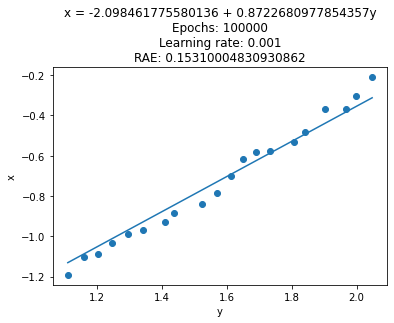

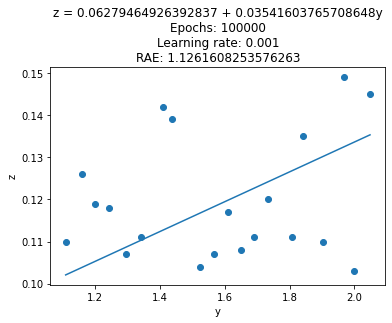

Com alpha = 0.001 - A posição da bola quando ela for atingir o gol (y=0) será x = -2.098461775580136 e z = 0.06279464926392837

Dados não normalizados - Regressão Linear com alpha = 0.01


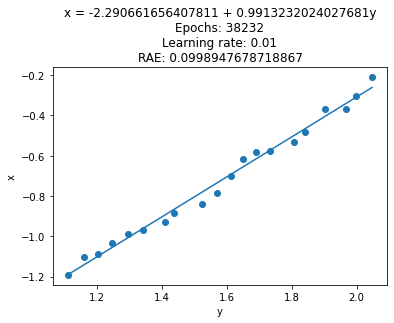

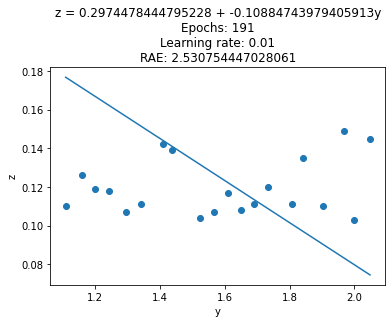

Com alpha = 0.01 - A posição da bola quando ela for atingir o gol (y=0) será x = -2.290661656407811 e z = 0.2974478444795228

Dados não normalizados - Regressão Linear com alpha = 0.1


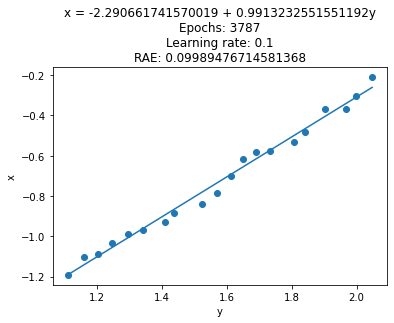

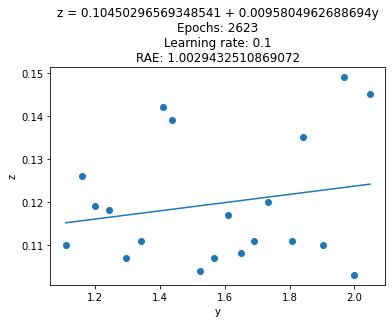

Com alpha = 0.1 - A posição da bola quando ela for atingir o gol (y=0) será x = -2.290661741570019 e z = 0.10450296569348541

Dados normalizados - Regressão Linear com alpha = 0.001


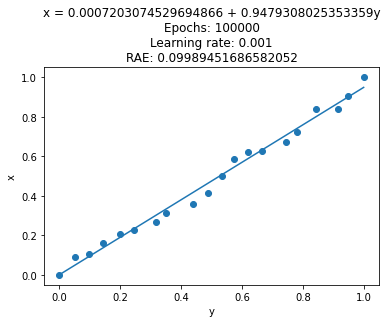

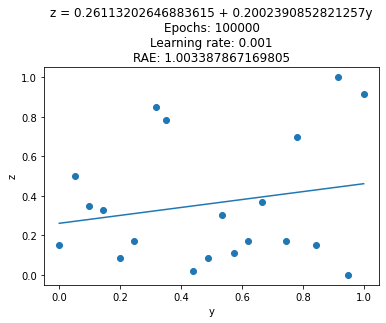

Dados Normalizados com alpha = 0.001 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.191292658081184 e z = 0.11501207321756646

Dados normalizados - Regressão Linear com alpha = 0.01


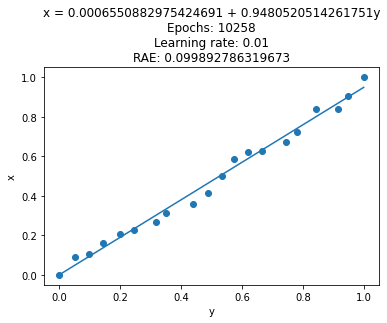

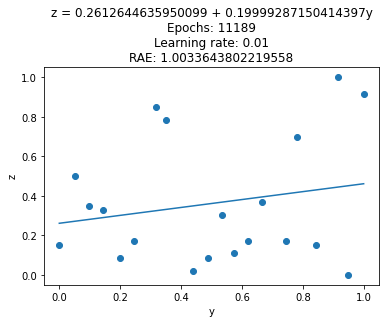

Dados Normalizados com alpha = 0.01 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.1913567032918133 e z = 0.11501816532537044

Dados normalizados - Regressão Linear com alpha = 0.1


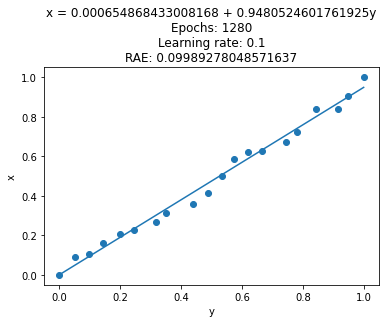

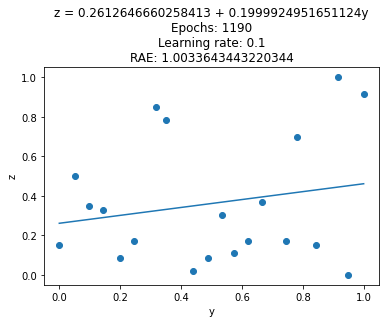

Dados Normalizados com alpha = 0.1 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.1913569191987858 e z = 0.11501817463718869



In [32]:
linear_regression(data1)

Como podemos observar para os dados não normalizados o valor de learning rate influencia no RAE, de forma que temos valores de RAE muito próximos para alpha(learning rate) igual a 0.01 e 0.1, porém para 0.1 o número de epochs é menor, o que mostra que é o mais eficiente dos 3 valores de learning rates testasdos nesse caso. Para os dados não normalizados obtivemos resultados parecidos para os três valores de alpha testados, mas ainda assim o alpha = 0.1 é um pouco melhor que os outros rates. 

Em todos os casos o valor de RAE para a linearização no eixo z está alto, o que aponta um erro grande na previsão do resultado. Isso se dá provavelmente devido a variação no eixo z ser muito pequena, ao mesmo tempo os pontos parecem estar dispostos de forma aleatória dentro desse curto range, dificultando uma linearização que satisfaça a maioria. 

A melhor regressão linear que representa esse caso é utilizando alpha = 0.1 e os dados normalizados, pois possuí a menor taxa de erro e o menor número de epochs. Para essa regressão linear chegamos ao resultado de que a posição da bola no eixo x quando a bola atingir o gol (y = 0) será aproximadamente -1.19 e a posição no eixo z será aproximadamente 0.11.

Para o conjunto de dados "kick2.dat" temos:

Dados não normalizados - Regressão Linear com alpha = 0.001


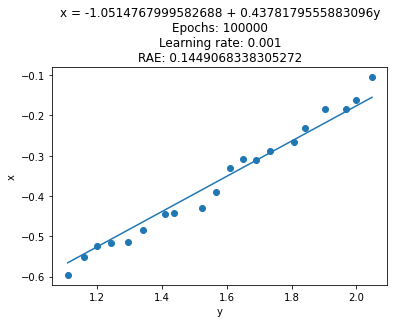

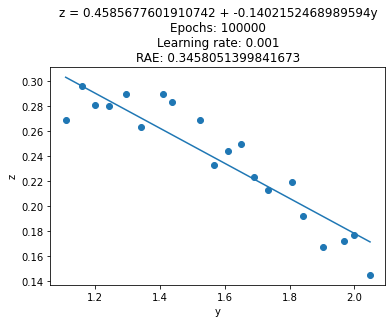

Com alpha = 0.001 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.0514767999582688 e z = 0.4585677601910742

Dados não normalizados - Regressão Linear com alpha = 0.01


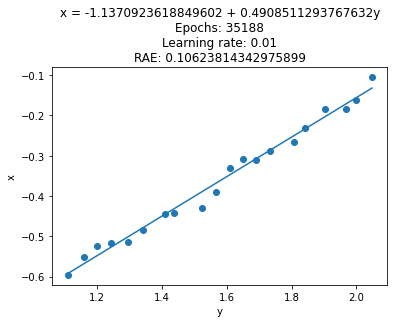

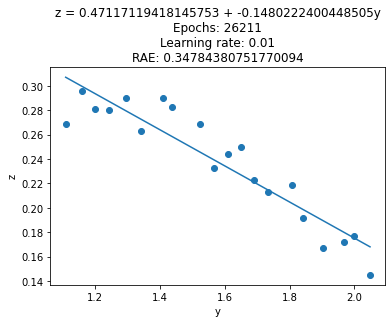

Com alpha = 0.01 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.1370923618849602 e z = 0.47117119418145753

Dados não normalizados - Regressão Linear com alpha = 0.1


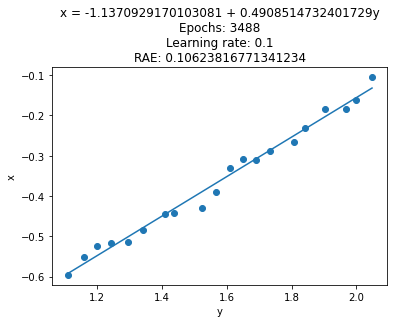

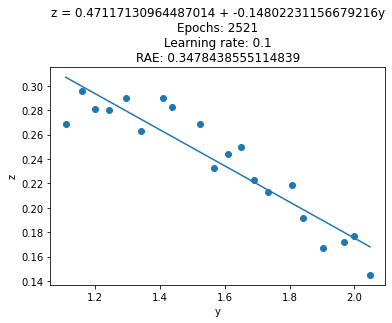

Com alpha = 0.1 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.1370929170103081 e z = 0.47117130964487014

Dados normalizados - Regressão Linear com alpha = 0.001


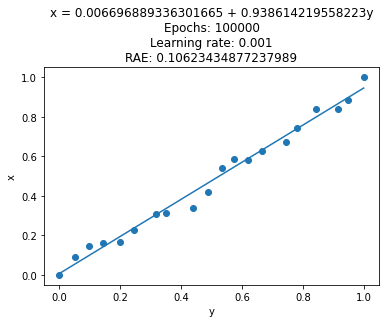

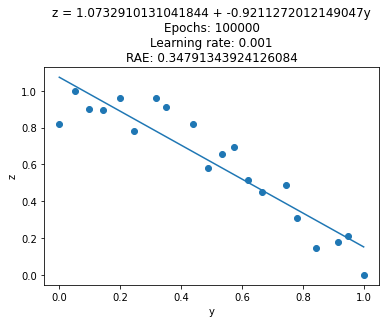

Dados Normalizados com alpha = 0.001 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.5927118273358759 e z = 0.3070669429787318

Dados normalizados - Regressão Linear com alpha = 0.01


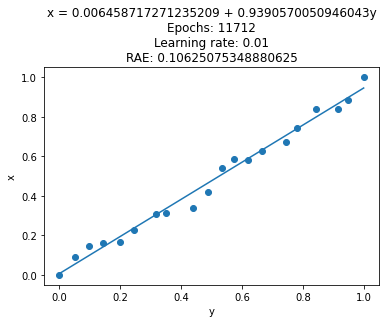

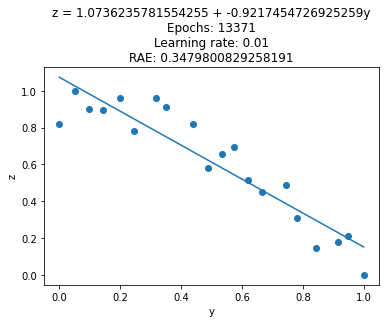

Dados Normalizados com alpha = 0.01 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.5928287698198235 e z = 0.30711716030146924

Dados normalizados - Regressão Linear com alpha = 0.1


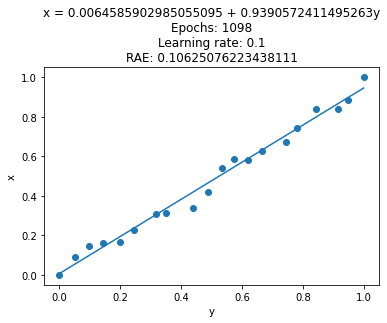

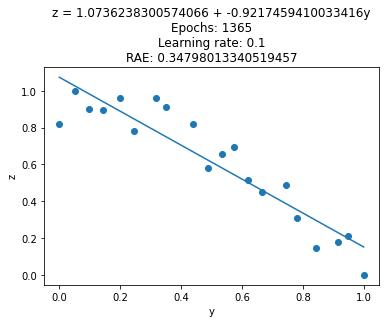

Dados Normalizados com alpha = 0.1 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.5928288321634337 e z = 0.30711719833866835



In [33]:
linear_regression(data2)

Assim como no conjunto de dado anterior, a influência do learning rate é grande no resultado, apresentando as mesmas características: o learning rate que apresenta melhor eficiência é o 0.1. Como esse conjunto de dados apresenta uma configuração melhor dos dados no eixo z obtivemos um ajuste linear com erro absoluto menor, se aproximando melhor da linearização ideal. 

A regressão com os dados normalizados e não normalizados tem valores de RAE muito próximos, o que as diferenciam é que o número de epochs com os dados normalizados são muito menores que com os dados não normalizados. Portanto a regressão linear mais eficiente continua sendo a com alpha = 0.1 e com os dados normalizados.Para essa regressão linear chegamos ao resultado de que a posição da bola no eixo x quando a bola atingir o gol (y = 0) será aproximadamente -0.59 e a posição no eixo z será aproximadamente 0.30. 


### Regressão Polinomial

As funções abaixo foram implementadas para realizar a regressão polinomial. Foi estabelecido que quando o passo de uma função polinomial para uma função mais próxima fosse menor que 0.00001 chegariamos essa função como ideal para o nosso problema.  Além disso, também paramos a regressão polinomial caso o programa rode 100000 vezes.

Optamos por fazer uma regressão polinomial quadrática, visto que ela atende os dois conjuntos de dados que estamos vendo. Para o cálculo da função de custo e atualização dos thetas da função quadrática optamos por fazer um mini Batch, usando 1/4 dos dados para realizar o cálculo. 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

#Função Gradiente
##Retorna nt com os valores de theta atualizados
## nt = [θ1,θ2,θ3]= θ1+θ2*x+θ3*x^2 
def grad_func(data, theta, alpha, fx, var):
    sd =[0,0,0]
    nt = [0,0,0]
    j=[]
    for i in range(len(data)//4):
            j.append(random.randrange(0, len(data)))
    for i in j:
        a = data[i][var]
        h = theta[0]+theta[1]*a+theta[2]*(a**2)
        sd[0] += (h-data[i][fx])
        sd[1] += (h-data[i][fx])*a
        sd[2] += (h-data[i][fx])*(a*a)
    sd[0]= sd[0]/len(data)
    sd[1]= sd[1]/len(data)
    sd[2]= sd[2]/len(data)
    nt[0] = theta[0]- alpha*sd[0]
    nt[1] = theta[1]- alpha*sd[1]
    nt[2] = theta[2]- alpha*sd[2]
    return nt

#Regressão Polinomial
##retorna uma tupla com os thetas da curva encontrada no eixo x e no eixo z
def regrassion(data, alpha):
    thetax = np.array([random.random(),random.random(),random.random()])
    thetaz = np.array([random.random(),random.random(),random.random()])
    ep_x = 0
    ep_z = 0
    #thetas de x
    while(ep_x < 100000):
        ep_x += 1
        new_thetax = grad_func(data, thetax, alpha, 0, 1)
        if((abs(new_thetax[0]-thetax[0])<=0.00001) and (abs(new_thetax[1]-thetax[1])<=0.00001) and (abs(new_thetax[2]-thetax[2])<=0.00001)):
            thetax = new_thetax
            break
        else:
            thetax = new_thetax
    rae_x = RAE(data, thetax, 0)
    plot_eq(data,thetax,0,1,rae_x,ep_x,alpha)

    #thetas de z
    while(ep_z < 100000):
        ep_z += 1
        new_thetaz = grad_func(data, thetaz, alpha, 2, 1)
        if((abs(new_thetaz[0]-thetaz[0])<=0.00001) and (abs(new_thetaz[1]-thetaz[1])<=0.00001) and (abs(new_thetaz[2]-thetaz[2])<=0.00001)):
            thetaz = new_thetaz
            break
        else:
            thetaz = new_thetaz
    
    rae_z = RAE(data, thetaz, 2)
    plot_eq(data,thetaz,2,1,rae_z,ep_z,alpha)
    return(thetax , thetaz)

def plot_eq(data,theta,fx, v,rae, ep,alpha):
    x = np.take(data,fx,1)
    y = np.take(data,v,1)
    new_x = []
    title = "alpha = "+str(alpha)+"\n"
    for i in y:
        val = theta[0]+(theta[1]*i)+theta[2]*(i**2)
        new_x.append(val)
    plt.plot(y,x,"r.")
    plt.plot(y,new_x)
    plt.xlabel('Y')
    if (fx == 0):
        plt.ylabel('X')
        title+='x = '
    else:
        plt.ylabel('Z')
        title+='z = '
    title += "{:.2f}".format(theta[0])+"+"
    title += "{:.2f}".format(theta[1])+"y+"
    title += "{:.2f}".format(theta[2])+"y^2"
    title += "\nRAE = "+str(rae)
    title += "\nEpochs = "+str(ep)
    plt.title(title)
    plt.show()
    
def RAE(data, theta, v):
    d = np.take(data,v,1)
    y = np.take(data,1,1)
    m = np.mean(d)
    sum1 = 0
    sum2 = 0
    for i in range(d.shape[0]):
        sum1 = sum1 + abs(theta[0]+(theta[1]*y[i])+theta[2]*(y[i]**2) - data[i][v])
        sum2 = sum2 + abs(data[i][v] - m)

    return sum1 / sum2 

def denormalize(num, min_v, max_v):
    denormalized = num * (max_v - min_v) + min_v
    return denormalized

Para o conjunto kick1.dat temos:

Dados não normalizados:


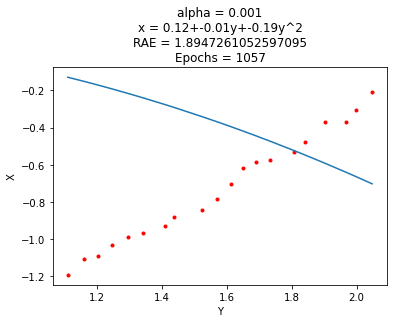

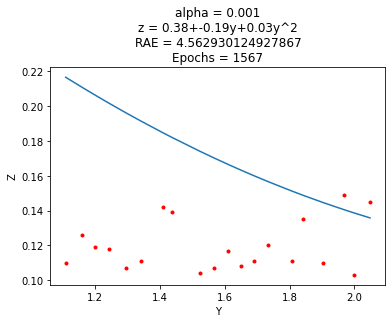

Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = 0.12 e z = 0.38


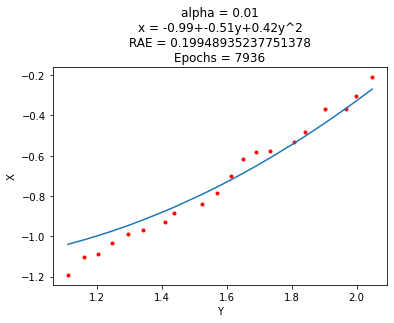

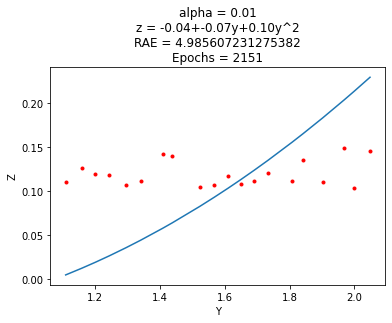

Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.99 e z = -0.04


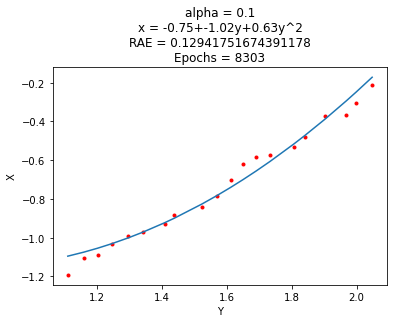

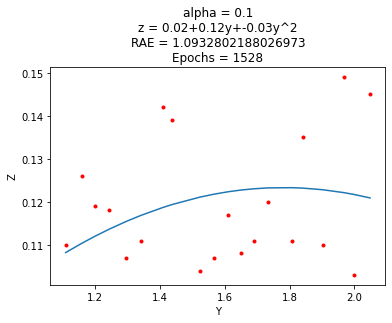

Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.75 e z = 0.02

Dados normalizados:



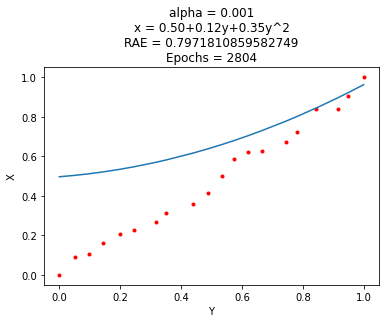

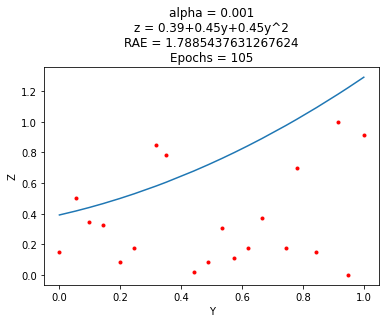

Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.70 e z = 0.12


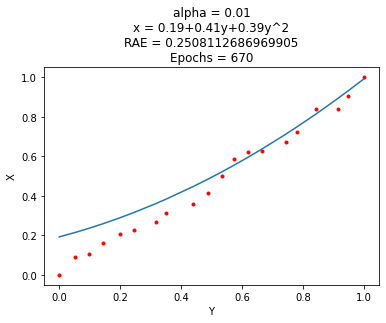

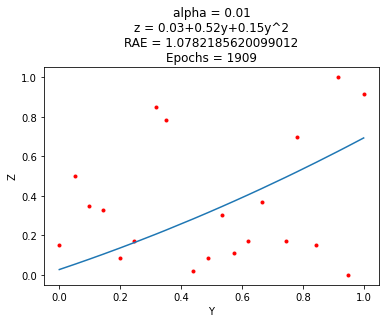

Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.00 e z = 0.10


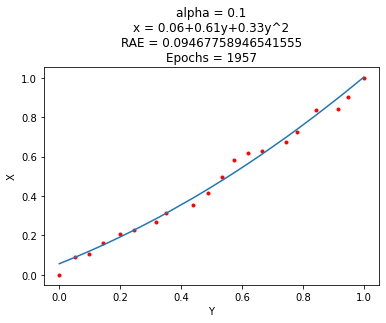

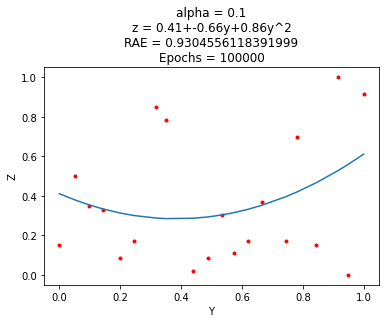

Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = -1.14 e z = 0.12


In [27]:
    print("Dados não normalizados:")
    tx_1, tz_1 =regrassion(data1,0.001)
    print("Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(tx_1[0])+" e z = " "{:.2f}".format(tz_1[0]))
    tx_2, tz_2 =regrassion(data1,0.01)
    print("Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(tx_2[0])+" e z = " "{:.2f}".format(tz_2[0]))
    tx_3, tz_3 =regrassion(data1,0.1)
    print("Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(tx_3[0])+" e z = " "{:.2f}".format(tz_3[0]))
    
    print("\nDados normalizados:")
    scaler = MinMaxScaler()
    min_x = min(data1[:,0])
    max_x = max(data1[:,0])
    min_z = min(data1[:,2])
    max_z = max(data1[:,2])
    dataNorm = scaler.fit_transform(data1)
    print()
    tx_1, tz_1 =regrassion(dataNorm,0.001)
    print("Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(denormalize(tx_1[0], min_x, max_x))+" e z = " "{:.2f}".format(denormalize(tz_1[0], min_z, max_z)))
    tx_2, tz_2 =regrassion(dataNorm,0.01)
    print("Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(denormalize(tx_2[0], min_x, max_x))+" e z = " "{:.2f}".format(denormalize(tz_2[0], min_z, max_z)))
    tx_3, tz_3 =regrassion(dataNorm,0.1)
    print("Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(denormalize(tx_3[0], min_x, max_x))+" e z = " "{:.2f}".format(denormalize(tz_3[0], min_z, max_z)))

Para a regressão polinomial quanto menor o learning rate maior é a taxa de erro RAE, de forma que é possível ver que a projeção polinomial com alpha = 0.001 dos dados não normalizados está completamente errada. Assim como na regressão linear, o melhor valor de alpha testado para esse caso é o 0.1, que apresenta valores de RAE mais baixos. 

Para alpha = 0.1 o erro da regressão polinomial no eixo x para os dados normalizados e não normalizados são baixos e bem próximos um do outro, porém o número de epochs para os dados normalizados é muito menor que o dos dados não normalizados. Para o eixo z no entanto é possível observar que a curva encontrada para os dados normalizados possúi um erro menor. Portanto o método mais eficiente nesse caso é usar os dados normalizados e learning rate = 0.1.

Com isso chegamos ao resultado de que a posição da bola no eixo x quando a bola atingir o gol (y = 0) será aproximadamente -1.1 e a posição no eixo z será aproximadamente 0.12.

Comparando esses resultados com os resultados da regressão linear podemos observar que os valores de RAE dos melhores métodos de regressão são muito similares. Para o eixo z ambos apresentem valores de RAE considerados altos, mostrando que para esse eixo não temos uma precisão muito alta. Apesar disso a regressão linear realiza menos epochs para chegar a um resultado bem próximo da regressão linear, portanto é mais eficiente. 
As posições finais em x e z são próximas, o que nos dá o resultado : x ≅ -1.1 e z ≅ 0.11 

Para o conjunto kick2.dat temos:

Dados não normalizados:


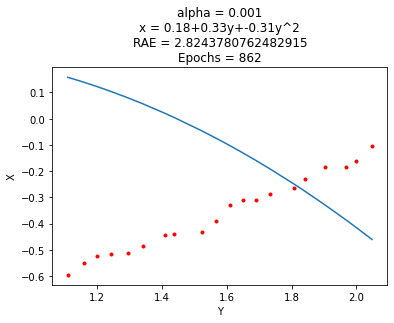

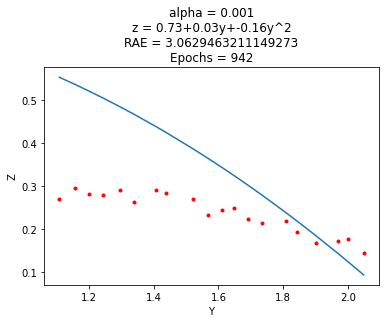

Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = 0.18 e z = 0.73


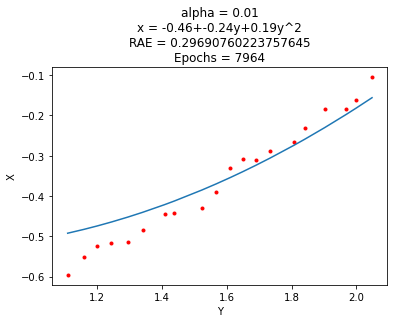

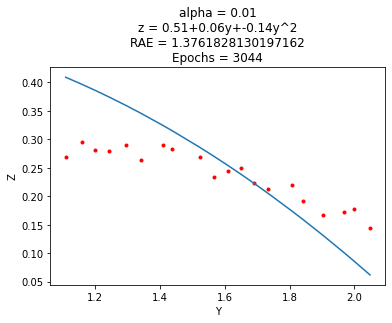

Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.46 e z = 0.51


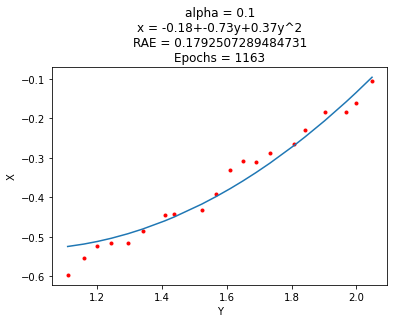

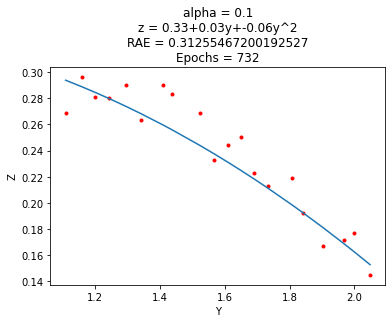

Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.18 e z = 0.33

Dados normalizados:



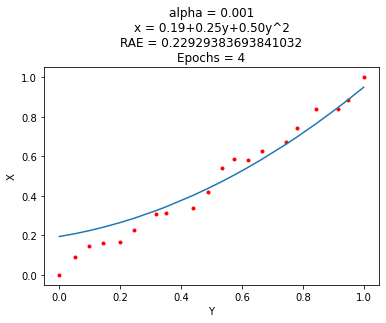

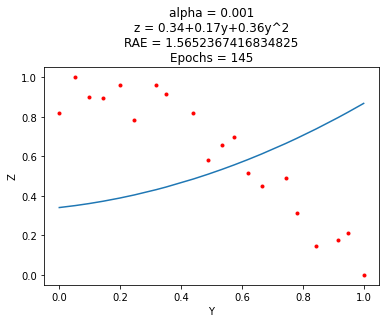

Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.50 e z = 0.20


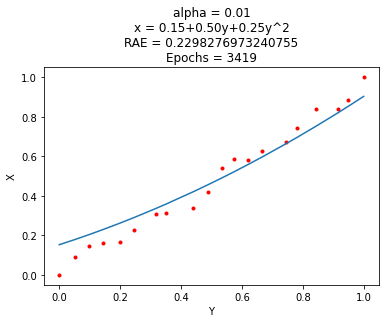

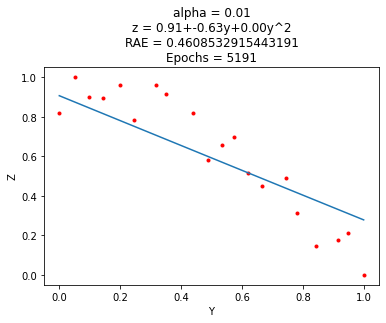

Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.52 e z = 0.28


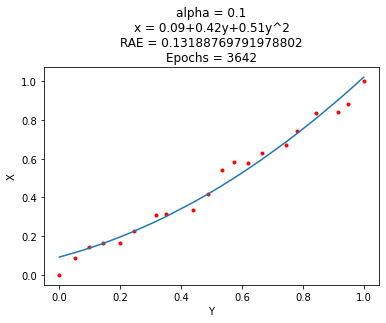

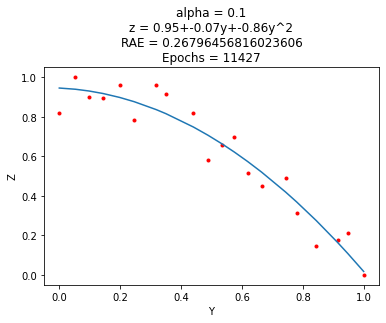

Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = -0.55 e z = 0.29


In [42]:
print("Dados não normalizados:")
tx_1, tz_1 =regrassion(data2,0.001)
print("Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(tx_1[0])+" e z = " "{:.2f}".format(tz_1[0]))
tx_2, tz_2 =regrassion(data2,0.01)
print("Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(tx_2[0])+" e z = " "{:.2f}".format(tz_2[0]))
tx_3, tz_3 =regrassion(data2,0.1)
print("Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(tx_3[0])+" e z = " "{:.2f}".format(tz_3[0]))
    
print("\nDados normalizados:")
scaler = MinMaxScaler()
min_x = min(data2[:,0])
max_x = max(data2[:,0])
min_z = min(data2[:,2])
max_z = max(data2[:,2])
dataNorm = scaler.fit_transform(data2)
print()
tx_1, tz_1 =regrassion(dataNorm,0.001)
print("Com alpha = 0,001 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(denormalize(tx_1[0], min_x, max_x))+" e z = " "{:.2f}".format(denormalize(tz_1[0], min_z, max_z)))
tx_2, tz_2 =regrassion(dataNorm,0.01)
print("Com alpha = 0,01 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(denormalize(tx_2[0], min_x, max_x))+" e z = " "{:.2f}".format(denormalize(tz_2[0], min_z, max_z)))
tx_3, tz_3 =regrassion(dataNorm,0.1)
print("Com alpha = 0,1 - A posição da bola quando ela for atingir o gol (y=0) será x = "+"{:.2f}".format(denormalize(tx_3[0], min_x, max_x))+" e z = " "{:.2f}".format(denormalize(tz_3[0], min_z, max_z)))

Nesse conjunto de dados novamente obtivemos resultados com erros muito grandes para o valor de learning rate  = 0.001, e o melhor resultado foi com alpha = 0.1.

Os valores de RAE com os dados normalizados são menores, portanto o melhor método continua sendo dados normalizados e alpha = 0.1. Com isso chegamos ao resultado de que a posição da bola no eixo x quando a bola atingir o gol (y = 0) será aproximadamente -0.55 e a posição no eixo z será aproximadamente 0.29.

Comparando com os resultados da regressão linear nos dados do arquivo kick2.dat é possível observar que para o eixo x a regressão linear é mais precisa e eficiente, mas para o eixo z a regressão polinomial consegue ser mais precisa e encontra uma equação que descreve melhor os dados. Portanto podemos concluir que a posição final da bola quando atingir o gol (y = 0) será : x ≅ -0.59 e z ≅ 0.29  

## Parte 2

### Introdução

Para a tarefa de classificação utilizando o dataset 'Pen-Based Recognition of Handwritten Digit', vamos utilizar dois diferentes métodos: Árvore de Decisão e Multiclasse - OneVsOne.

In [44]:
from sklearn.model_selection import cross_validate
import sklearn.metrics as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

Os dados foram importados da biblioteca sklearn e todos eles foram normalizados para o intervalo de [0, 1]. 90% dos dados foram utilziados para treinamento enquanto 10% foram separados para teste.

In [45]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Load datasets
digits = datasets.load_digits()
data = digits['data']
target = digits['target']

#Pre-processing data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

#Splitting data
dataData, testData, dataLabel, testLabel = train_test_split(data, target, test_size = 0.1, random_state = 42)

Para plotar os dados, o t-SNE foi o método que produziu melhores resultados, ainda que apresentando certa divergência para alguns casos (como o número 1, por exemplo).

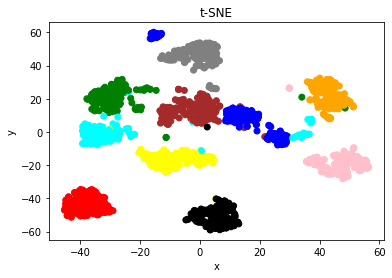

In [46]:
from sklearn.manifold import TSNE

def plot_2D(ND, label,titulo):
    color = {
        0 : 'red',
        1 : 'blue',
        2 : 'gray',
        3 : 'green',
        4 : 'pink',
        5 : 'yellow',
        6 : 'black',
        7 : 'orange',
        8 : 'brown',
        9 : 'cyan'
        }

    #convert the list to a pandas series temporarily before mapping
    label_color = (pd.Series(label)).map(color) 
    label_color = list(label_color)
    ax = plt.axes()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(titulo)

    NDy = np.take(ND,0,1)
    NDv = np.take(ND,1,1)

    plt.scatter(NDy, NDv, c=label_color)

    plt.show()

#Plot Data
plotData = TSNE(n_components=2, random_state = 42).fit_transform(dataData)
plot_2D(plotData,dataLabel, 't-SNE')

Com os dados já normalizados, foi executado os métodos de aprendizado supervisionados. Durante a construção do código, tentar utilizar os dados brutos, aconteceu casos em que recebíamos inúmeros warnings de tempo de execução. A normalização resolveu essa situação.

Para o treinamento foi utilizado o Cross-validate com 5 diferentes divisões. Para cada resultado, consideramos relevante avaliar a acurácia e a precisão das respostas obtidas. A partir desses valores, encontramos um valor médio para realizar a comparação entre os métodos.

Por ser um dos métodos mais conhecidos e amplamente utilizado, a Árvore de Decisão foi nossa primeira escolha para classificar os dados. Apesar de obtermos um bom resultado com ela, os valores de acurácia e precisão ficaram em torno de 0.84.

In [47]:
from sklearn.tree import DecisionTreeClassifier

#DECISION TREE
clf = DecisionTreeClassifier()
decisionTree_train_clf = clf.fit(dataData, dataLabel)

#Results of train_test set w clf learned in decision tree
scores = cross_validate(decisionTree_train_clf, dataData, dataLabel, cv=5, scoring=['accuracy', 'precision_micro'])
print("Decision Tree - Accuracy: ", scores['test_accuracy'])
print("Decision Tree - Accuracy mean: ", scores['test_accuracy'].mean())
print("Decision Tree - Precision: ", scores['test_precision_micro'])
print("Decision Tree - Precision mean: ", scores['test_precision_micro'].mean())

Decision Tree - Accuracy:  [0.85493827 0.83641975 0.81424149 0.85139319 0.84520124]
Decision Tree - Accuracy mean:  0.8404387876008104
Decision Tree - Precision:  [0.85493827 0.83641975 0.81424149 0.85139319 0.84520124]
Decision Tree - Precision mean:  0.8404387876008104


Ao observar os dados, optamos pelo método de Multiclass para classificar os dados entre as diferentes classes. Como a variação da caligrafia entre diferentes números pode ser sútil, o modo OneVsOne foi escolhido apesar de ser mais custoso.

In [48]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

#MULTICLASS OVO
svm = LinearSVC()
ovo = OneVsOneClassifier(svm)
ovo = ovo.fit(dataData, dataLabel)

#Results OVO
scores_2 = cross_validate(ovo, dataData, dataLabel, cv=5, scoring=['accuracy', 'precision_micro'])
print("Multiclass OneVsOne - Accuracy: ", scores_2['test_accuracy'])
print("Multiclass OneVsOne - Accuracy mean: ", scores_2['test_accuracy'].mean())
print("Multiclass OneVsOne - Precision: ", scores_2['test_precision_micro'])
print("Multiclass OneVsOne - Precision mean: ", scores_2['test_precision_micro'].mean())

Multiclass OneVsOne - Accuracy:  [0.9845679  0.9845679  0.96904025 0.98452012 0.98142415]
Multiclass OneVsOne - Accuracy mean:  0.9808240645185948
Multiclass OneVsOne - Precision:  [0.9845679  0.9845679  0.96904025 0.98452012 0.98142415]
Multiclass OneVsOne - Precision mean:  0.9808240645185948


A partir da análise das resultados obtidos, observamos que o desempenho do 'Multiclass OneVsOne' foi melhor tanto quanto à acurácia quanto em relação à precisão. Curiosamente, os valores encontrado nas duas métricas foram exatamente os mesmos.

Com essas informações em mãos, escolhemos aplicar o conjunto de teste ao modelo treinado pelo 'Multiclass OneVsOne'. O resultado dessa aplicação foi bem satisfatório, atingindo uma acurácia bem próxima da encontrada durante o treinamento.

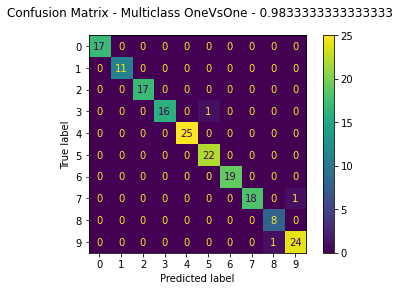

In [49]:
#OVO - Test Set
trainData = ovo.predict(testData)
acc = sk.accuracy_score(testLabel, trainData)
model = "Multiclass OneVsOne - "+str(acc)

disp = sk.plot_confusion_matrix(ovo, testData, testLabel)
disp.figure_.suptitle("Confusion Matrix - "+model)
plt.show()

Para confirmar nossa escolha, aplicamos o conjunto de teste ao modelo gerado pela 'Árvore de Decisão'. Como esperado, o resultado apresentou mais erros quando comparado ao Multiclass OneVsOne, sendo consistente com os valores de acurácia encontrados durante o treinamento.

Em ambas as matrizes de confusão, o número 1 foi um dos dados que apresentou maior problema, o que era esperado se considerarmos a visualização dos dados obtida utilizando o t-SNE.

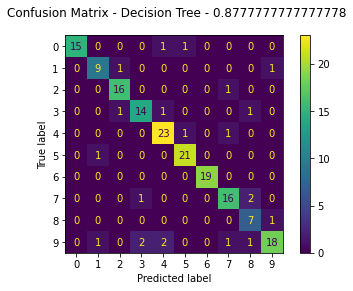

In [50]:
#Decision Tree - Test Set
trainData = decisionTree_train_clf.predict(testData)
acc = sk.accuracy_score(testLabel, trainData)
model = "Decision Tree - "+str(acc)

disp = sk.plot_confusion_matrix(decisionTree_train_clf, testData, testLabel)
disp.figure_.suptitle("Confusion Matrix - "+model)
plt.show()

##### Divisão das responsabilidades
Nesse projeto, optamos por dividir o projeto de forma que cada membro fizesse uma parte de cada parte do projeto, para que ambos exercitassem o aprendizado de regressão e classificação, podendo se ajudar durante todo o processo. 

Para a parte 1: 
    Felipe ficou responsável pela regressão linear;
    Letícia ficou responsável pela regressão polinomial;
   
Para a parte 2 cada membro ficou responsável de pesquisar e usar um método de classificação por aprendizado supervisionado de forma que fizemos:
    Felipe implementou o método Multiclass OneVsOne;
    Letícia implementou o método Decision Tree;
    
 